# Lab 1: Build Your First Linear Model!

## Welcome to Your First Hands-On Lab!

This is where YOU get to practice! Don't worry - we'll guide you every step of the way.

### What You'll Build:
A model to predict **apartment rent prices** based on size and location!

### Learning Goals:
- Load and explore data
- Visualize relationships
- Train a Linear Regression model
- Make predictions
- Evaluate your model

### Don't Panic!
- Read each instruction carefully
- Try the TODO exercises yourself first
- Hints are provided if you get stuck
- Solutions are at the end (but try not to peek!)

**Let's build something cool!**

## Step 1: Import Libraries

First, let's import the tools we need.

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Make plots look nice
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

print("Libraries imported successfully!")
print("You're ready to build your first model!")

Libraries imported successfully!
You're ready to build your first model!


## Step 2: Create the Dataset

We'll create a dataset of apartment rentals with:
- **Size** (square meters)
- **Distance from city center** (km)
- **Monthly rent** (euros)

In [6]:
# Create apartment data
np.random.seed(42)
n_apartments = 100

# Features
size = np.random.uniform(30, 120, n_apartments)  # 30-120 m²
distance = np.random.uniform(1, 15, n_apartments)  # 1-15 km from center

# Target: Monthly rent (simplified model)
# Bigger apartments cost more, farther apartments cost less
rent = (
    500 +                          # Base rent
    10 * size +                    # 10€ per m²
    -30 * distance +               # -30€ per km from center
    np.random.randn(n_apartments) * 100  # Some random variation
)

# Combine into feature matrix
X = np.column_stack([size, distance])
y = rent

print(f"Dataset created!")
print(f"Number of apartments: {n_apartments}")
print(f"Features: Size (m²) and Distance (km)")
print(f"Target: Monthly rent (€)")
print(f"\nFirst 5 apartments:")
print("Size (m²)  Distance (km)  Rent (€)")
print("-" * 40)
for i in range(5):
    print(f"{size[i]:8.1f}   {distance[i]:12.1f}   {rent[i]:7.0f}")

Dataset created!
Number of apartments: 100
Features: Size (m²) and Distance (km)
Target: Monthly rent (€)

First 5 apartments:
Size (m²)  Distance (km)  Rent (€)
----------------------------------------
    63.7            1.4      1026
   115.6            9.9      1382
    95.9            5.4      1326
    83.9            8.1      1024
    44.0           13.7       716


## Step 3: Explore the Data (ALWAYS DO THIS FIRST!)

Before building any model, you should ALWAYS look at your data!

### TODO 1: Calculate Basic Statistics

Calculate and print:
- Mean size
- Mean distance
- Mean rent
- Min and max rent

**Hint:** Use `np.mean()`, `np.min()`, `np.max()`

In [7]:
# TODO 1: YOUR CODE HERE
# Create a DataFrame and use describe() for comprehensive statistics

# Create a DataFrame with all features
df = pd.DataFrame({
    'Size (m²)': size,
    'Distance (km)': distance,
    'Rent (€)': rent
})

# Display comprehensive statistics
print("Dataset Statistics:")
print("=" * 50)
print(df.describe().round(2))

print(f"\nKey Statistics:")
print(f"Average apartment size: {df['Size (m²)'].mean():.1f} m²")
print(f"Average distance from center: {df['Distance (km)'].mean():.1f} km")
print(f"Average rent: €{df['Rent (€)'].mean():.0f}")
print(f"Cheapest rent: €{df['Rent (€)'].min():.0f}")
print(f"Most expensive rent: €{df['Rent (€)'].max():.0f}")

Dataset Statistics:
       Size (m²)  Distance (km)  Rent (€)
count     100.00         100.00    100.00
mean       72.32           7.97    994.88
std        26.77           4.10    296.81
min        30.50           1.10    294.21
25%        47.39           4.39    765.67
50%        71.77           8.08    980.57
75%        95.72          11.73   1230.07
max       118.82          14.80   1553.60

Key Statistics:
Average apartment size: 72.3 m²
Average distance from center: 8.0 km
Average rent: €995
Cheapest rent: €294
Most expensive rent: €1554


In [8]:
df.describe()

,Size (m²),Distance (km),Rent (€)
count,100.000000,100.000000,100.000000
mean,72.316267,7.969644,994.876686
std,26.774047,4.103558,296.806643
min,30.496991,1.097330,294.212520
25%,47.388068,4.388063,765.671859
50%,71.772821,8.078748,980.566760
75%,95.718281,11.726570,1230.071750
max,118.819824,14.799106,1553.598661


### TODO 2: Visualize Rent vs. Size

Create a scatter plot showing the relationship between apartment size and rent.

**Hint:** 
```python
plt.scatter(size, rent)
plt.xlabel('...')
plt.ylabel('...')
plt.title('...')
plt.show()
```

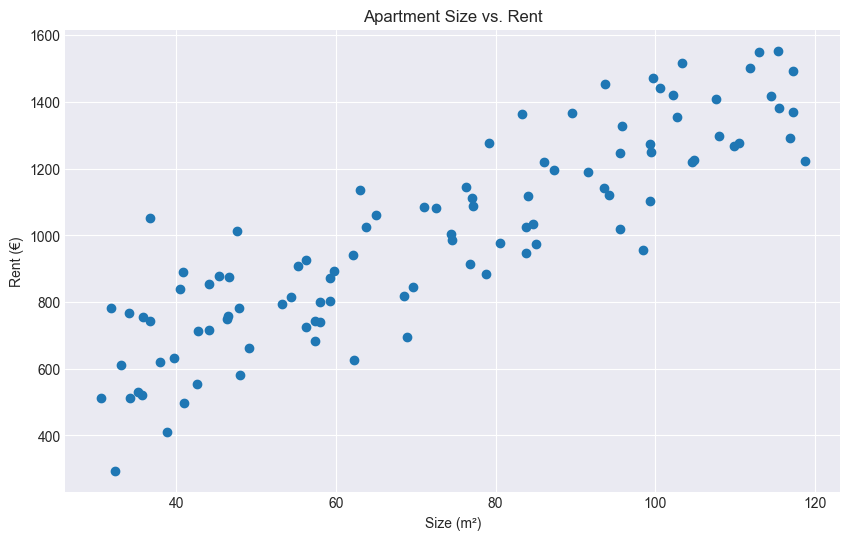

In [12]:
# Create a scatter plot of size vs rent

plt.figure(figsize=(10, 6))
plt.scatter(size, rent)
plt.xlabel('Size (m²)')
plt.ylabel('Rent (€)')
plt.title('Apartment Size vs. Rent')
plt.show()
# What do you notice? Does bigger size mean higher rent?

### TODO 3: Visualize Rent vs. Distance

Create a scatter plot showing the relationship between distance and rent.

**Question:** What pattern do you expect to see?

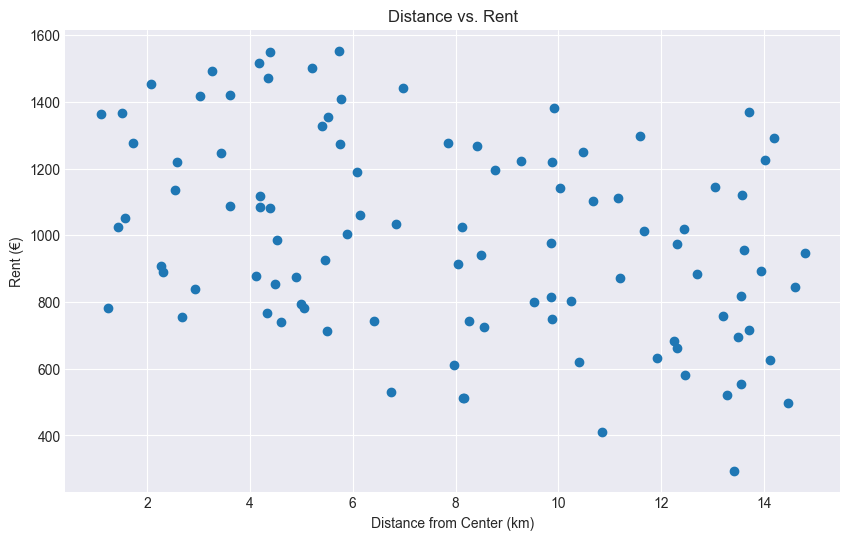

In [13]:
# Create a scatter plot of distance vs rent

plt.figure(figsize=(10, 6))
plt.scatter(distance, rent)
plt.xlabel('Distance from Center (km)')
plt.ylabel('Rent (€)')
plt.title('Distance vs. Rent')
plt.show()

# What do you notice? Does distance affect rent?

## Step 4: Split the Data

We need to split our data into:
- **Training set** (80%): To teach the model
- **Test set** (20%): To evaluate the model

**Why?** We need to test on data the model hasn't seen before!

### TODO 4: Split the Dataset

Use `train_test_split` to create training and test sets.

**Hint:**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

In [14]:
# TODO 4: YOUR CODE HERE
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} apartments")
print(f"Test set size: {len(X_test)} apartments")
print(f"\nWe'll train on {len(X_train)} apartments")
print(f"and test on {len(X_test)} apartments the model hasn't seen!")

Training set size: 80 apartments
Test set size: 20 apartments

We'll train on 80 apartments
and test on 20 apartments the model hasn't seen!


## Step 5: Train Your First Model!

This is the exciting part! Let's build and train a Linear Regression model.

### TODO 5: Create and Train the Model

**Steps:**
1. Create a `LinearRegression` model
2. Fit it to the training data

**Hint:**
```python
model = LinearRegression()
model.fit(X_train, y_train)
```

In [15]:
# TODO 5: YOUR CODE HERE
# Create and train the model


model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print("\nYour model has learned the relationship between:")
print("- Apartment size")
print("- Distance from city center")
print("and the monthly rent!")

Model trained successfully!

Your model has learned the relationship between:
- Apartment size
- Distance from city center
and the monthly rent!


## Step 6: Examine the Model

Let's see what the model learned!

### TODO 6: Print Model Parameters

Print:
- Intercept (θ₀)
- Coefficients for size and distance (θ₁ and θ₂)

**Hint:**
```python
model.intercept_
model.coef_
```

In [16]:
# TODO 6: YOUR CODE HERE
# Print the model's parameters

intercept = model.intercept_
coef_size = model.coef_[0]
coef_distance = model.coef_[1]

print("Model Parameters:")
print(f"\nIntercept (base rent): €{intercept:.2f}")
print(f"Coefficient for size: €{coef_size:.2f} per m²")
print(f"Coefficient for distance: €{coef_distance:.2f} per km")

print("\nInterpretation:")
print(f"- Base rent is €{intercept:.2f}")
print(f"- Each additional m² adds €{coef_size:.2f} to the rent")
print(f"- Each km from center changes rent by €{coef_distance:.2f}")

Model Parameters:

Intercept (base rent): €482.04
Coefficient for size: €9.72 per m²
Coefficient for distance: €-24.38 per km

Interpretation:
- Base rent is €482.04
- Each additional m² adds €9.72 to the rent
- Each km from center changes rent by €-24.38


## Step 7: Make Predictions!

Now let's use our model to predict rent for apartments it hasn't seen!

### TODO 7: Predict on Test Set

Use your model to predict rents for the test set.

**Hint:**
```python
y_pred = model.predict(X_test)
```

In [17]:
# TODO 7: YOUR CODE HERE
# Make predictions on the test set

y_pred = model.predict(X_test)

print("Predictions made!")
print("\nFirst 5 predictions vs. actual values:")
print("Actual Rent  |  Predicted Rent  |  Difference")
print("-" * 50)
for i in range(5):
    diff = y_test[i] - y_pred[i]
    print(f"€{y_test[i]:7.0f}     |  €{y_pred[i]:7.0f}          |  €{diff:6.0f}")

Predictions made!

First 5 predictions vs. actual values:
Actual Rent  |  Predicted Rent  |  Difference
--------------------------------------------------
€    522     |  €    506          |  €    17
€   1276     |  €   1365          |  €   -89
€   1249     |  €   1194          |  €    55
€   1366     |  €   1316          |  €    50
€    795     |  €    879          |  €   -84


## Step 8: Visualize Predictions

Let's visualize how well our predictions match the actual values.

### TODO 8: Create Prediction Plot

Create a scatter plot:
- X-axis: Actual rent
- Y-axis: Predicted rent
- Add a diagonal line (perfect predictions)

**Hint:**
```python
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
```

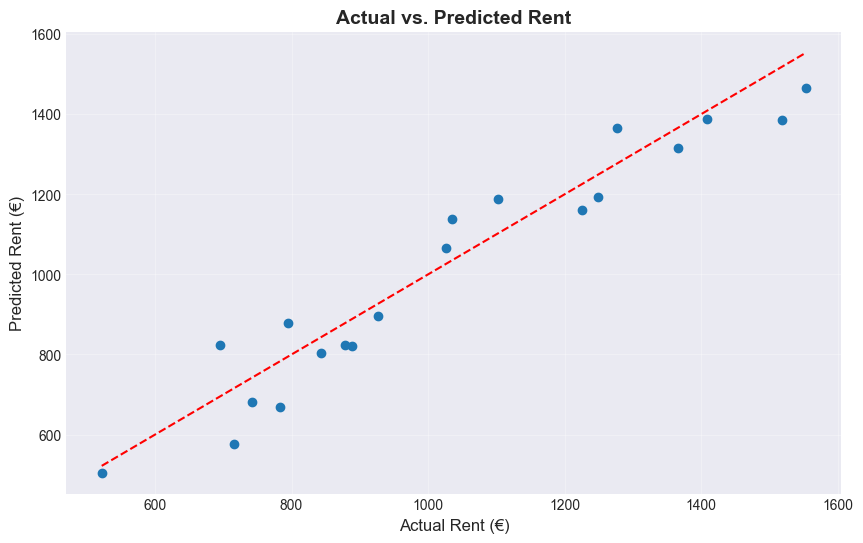


How to read this plot:
- Points on the red line = perfect predictions
- Points above the line = model predicted too high
- Points below the line = model predicted too low


In [19]:
# TODO 8: YOUR CODE HERE
# Create a scatter plot of actual vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Rent (€)', fontsize=12)
plt.ylabel('Predicted Rent (€)', fontsize=12)
plt.title('Actual vs. Predicted Rent', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("\nHow to read this plot:")
print("- Points on the red line = perfect predictions")
print("- Points above the line = model predicted too high")
print("- Points below the line = model predicted too low")

In [53]:
# Show the formula for the mean squared error (MSE)

# MSE = 1/n * Σ(y_i - y_pred_i)^2

Actual: €522.11, Predicted: €505.52, Squared Error: 275.33
Actual: €1275.99, Predicted: €1365.26, Squared Error: 7968.77
Actual: €1249.07, Predicted: €1193.80, Squared Error: 3054.62
Actual: €1366.15, Predicted: €1316.45, Squared Error: 2470.56
Actual: €794.88, Predicted: €878.55, Squared Error: 6999.74

Mean Squared Error (MSE): 6664.32


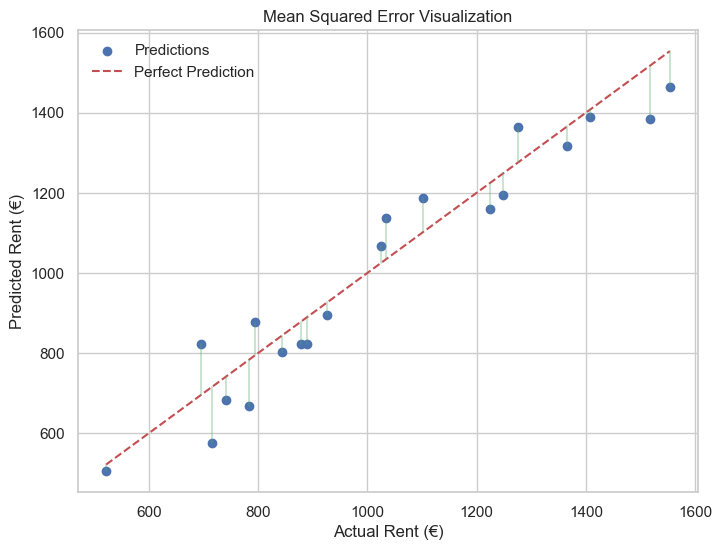

In [51]:
# Illustrate how mean squared error (MSE) is calculated

# Calculate squared errors
squared_errors = (y_test - y_pred)**2

# Show a few squared errors to the user
for i in range(5):
    print(f"Actual: €{y_test[i]:.2f}, Predicted: €{y_pred[i]:.2f}, Squared Error: {(squared_errors[i]):.2f}")

# Calculate and print mean squared error
mse = np.mean(squared_errors)
print(f"\nMean Squared Error (MSE): {mse:.2f}")

# Visualize: connect actual and predicted values with lines to show errors
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

# Draw lines from each actual point to its prediction
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]], 'g-', alpha=0.3)

plt.xlabel('Actual Rent (€)')
plt.ylabel('Predicted Rent (€)')
plt.title('Mean Squared Error Visualization')
plt.legend()
plt.show()


## Step 9: Evaluate Your Model

How good is your model? Let's calculate some metrics!

### TODO 9: Calculate R² Score

Calculate the R² score on both training and test sets.

**Hint:**
```python
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
```

**Remember:**
- R² = 1.0: Perfect fit
- R² > 0.9: Excellent
- R² > 0.7: Good
- R² > 0.5: Okay
- R² < 0.5: Needs improvement

In [20]:
# Calculate R² scores based on the model's performance
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print("Model Performance:")
print(f"\nR² Score (Training): {r2_train:.4f} ({r2_train*100:.2f}%)")
print(f"R² Score (Test):     {r2_test:.4f} ({r2_test*100:.2f}%)")

if r2_test > 0.9:
    print("\nGrade: A+ (Excellent!)")
elif r2_test > 0.7:
    print("\nGrade: B (Good!)")
elif r2_test > 0.5:
    print("\nGrade: C (Okay)")
else:
    print("\nGrade: Needs improvement")

# Check for overfitting
if r2_train - r2_test > 0.1:
    print("\nWarning: Possible overfitting (training score much higher than test score)")
else:
    print("\nGood news: No significant overfitting detected!")

Model Performance:

R² Score (Training): 0.8839 (88.39%)
R² Score (Test):     0.9205 (92.05%)

Grade: A+ (Excellent!)

Good news: No significant overfitting detected!


### TODO 10: Calculate RMSE (Root Mean Squared Error)

RMSE tells you the average prediction error in euros.

**Hint:**
```python
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
```

In [21]:
# TODO 10: YOUR CODE HERE
# Calculate RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error: €{rmse:.2f}")
print(f"\nOn average, our predictions are off by about €{rmse:.0f}")
print(f"\nContext:")
print(f"- Average rent: €{np.mean(y_test):.0f}")
print(f"- Average error: €{rmse:.0f}")
print(f"- Error as % of average rent: {(rmse/np.mean(y_test)*100):.1f}%")

Root Mean Squared Error: €81.64

On average, our predictions are off by about €82

Context:
- Average rent: €1027
- Average error: €82
- Error as % of average rent: 7.9%


## Step 10: Use Your Model for New Predictions!

Now let's use your model to predict rent for brand new apartments!

### TODO 11: Predict for New Apartments

Predict the rent for these new apartments:
1. 50 m², 5 km from center
2. 80 m², 2 km from center
3. 100 m², 10 km from center

**Hint:**
```python
new_apartments = np.array([[50, 5], [80, 2], [100, 10]])
predictions = model.predict(new_apartments)
```

In [22]:
# TODO 11: YOUR CODE HERE
# Predict rent for new apartments

new_apartments = np.array([[50, 5], [80, 2], [100, 10]])
new_predictions = model.predict(new_apartments)

print("Rent Predictions for New Apartments:")
print("\nApartment Details          →  Predicted Rent")
print("-" * 50)
descriptions = [
    "50 m², 5 km from center",
    "80 m², 2 km from center",
    "100 m², 10 km from center"
]
for desc, pred in zip(descriptions, new_predictions):
    print(f"{desc:28s} →  €{pred:.0f}/month")

Rent Predictions for New Apartments:

Apartment Details          →  Predicted Rent
--------------------------------------------------
50 m², 5 km from center      →  €846/month
80 m², 2 km from center      →  €1211/month
100 m², 10 km from center    →  €1210/month


## Bonus Challenge: Analyze Feature Importance

Which feature has a bigger impact: size or distance?

In [24]:
model.coef_

array([  9.72224676, -24.3773304 ])

## Congratulations!

### You Did It!

You just:
- ✅ Created and explored a dataset
- ✅ Visualized relationships in data
- ✅ Split data into training and test sets
- ✅ Trained your first Linear Regression model
- ✅ Made predictions
- ✅ Evaluated model performance
- ✅ Used the model for real predictions

### What You Learned:
1. Always explore data before modeling
2. Split data to test on unseen examples
3. Linear Regression learns coefficients for each feature
4. R² score measures model quality
5. RMSE tells you average prediction error
6. Coefficients tell you feature importance

### Next Steps:
- Try Lab 2: Polynomial Features
- Experiment with different datasets
- Try adding more features

---

## You're a Data Scientist Now!

**You just built, trained, and evaluated a machine learning model from scratch!**

**That's AMAZING! Keep going!**

## Solutions (Only Look After Trying!)

Here are the solutions to all TODOs. But remember: **you learn by doing, not by copying!**

In [ ]:
# SOLUTION TO TODO 1
mean_size = np.mean(size)
mean_distance = np.mean(distance)
mean_rent = np.mean(rent)
min_rent = np.min(rent)
max_rent = np.max(rent)

In [ ]:
# SOLUTION TO TODO 2
plt.figure(figsize=(10, 6))
plt.scatter(size, rent, alpha=0.6, edgecolors='black', linewidths=0.5)
plt.xlabel('Size (m²)', fontsize=12)
plt.ylabel('Rent (€)', fontsize=12)
plt.title('Apartment Size vs. Rent', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# SOLUTION TO TODO 3
plt.figure(figsize=(10, 6))
plt.scatter(distance, rent, alpha=0.6, edgecolors='black', linewidths=0.5, color='orange')
plt.xlabel('Distance from Center (km)', fontsize=12)
plt.ylabel('Rent (€)', fontsize=12)
plt.title('Distance vs. Rent', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# SOLUTION TO TODO 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# SOLUTION TO TODO 5
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# SOLUTION TO TODO 6
intercept = model.intercept_
coef_size = model.coef_[0]
coef_distance = model.coef_[1]

In [ ]:
# SOLUTION TO TODO 7
y_pred = model.predict(X_test)

In [ ]:
# SOLUTION TO TODO 8
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='black', linewidths=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
        'r--', linewidth=2, label='Perfect Predictions')
plt.xlabel('Actual Rent (€)', fontsize=12)
plt.ylabel('Predicted Rent (€)', fontsize=12)
plt.title('Actual vs. Predicted Rent', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# SOLUTION TO TODO 9
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

In [ ]:
# SOLUTION TO TODO 10
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# SOLUTION TO TODO 11
new_apartments = np.array([[50, 5], [80, 2], [100, 10]])
new_predictions = model.predict(new_apartments)

In [48]:
# Method 2: Permutation Importance (BEST METHOD)
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, random_state=42, n_repeats=10)

print(perm_importance)


print(f"\n2. PERMUTATION IMPORTANCE (BEST METHOD):")
print("-" * 50)
print("Shows how much performance drops when feature is shuffled:")
print(f"Size: {perm_importance.importances_mean[0]:.3f} ± {perm_importance.importances_std[0]:.3f}")
print(f"Distance: {perm_importance.importances_mean[1]:.3f} ± {perm_importance.importances_std[1]:.3f}")
print("Higher values = more important feature!")


{'importances_mean': array([1.93174817, 0.3009803 ]), 'importances_std': array([0.46553721, 0.12838111]), 'importances': array([[2.42141323, 1.42411899, 2.26038589, 2.69568331, 1.9239389 ,
        1.92474996, 1.88554576, 2.11415736, 1.67097893, 0.99650933],
       [0.24687289, 0.31179192, 0.26883126, 0.42152313, 0.20310846,
        0.52895298, 0.28930028, 0.03059432, 0.30101576, 0.407812  ]])}

2. PERMUTATION IMPORTANCE (BEST METHOD):
--------------------------------------------------
Shows how much performance drops when feature is shuffled:
Size: 1.932 ± 0.466
Distance: 0.301 ± 0.128
Higher values = more important feature!


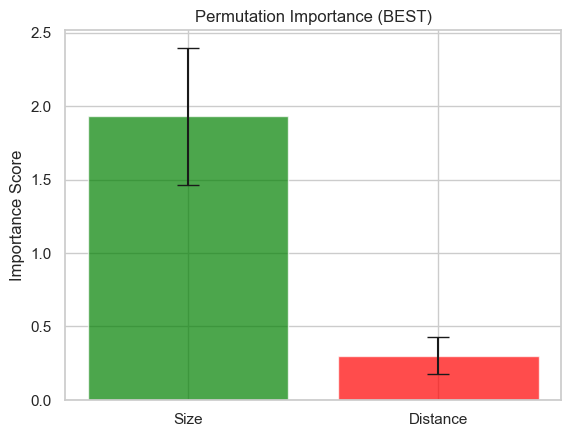

In [49]:
# Simpler: Visualize Permutation Importance, use default pyplot (no subplot)
import seaborn as sns

feat_names = ['Size', 'Distance']
imp = perm_importance.importances_mean
imp_std = perm_importance.importances_std

import matplotlib.pyplot as plt
colors = ['green', 'red']

plt.bar(feat_names, imp, yerr=imp_std, color=colors, alpha=0.7, capsize=8)
plt.title('Permutation Importance (BEST)')
plt.ylabel('Importance Score')
plt.show()
